<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-Modules" data-toc-modified-id="Import-Modules-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import Modules</a></span></li><li><span><a href="#Transmission-Across-Potential-Barrier" data-toc-modified-id="Transmission-Across-Potential-Barrier-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Transmission Across Potential Barrier</a></span></li><li><span><a href="#Ramsauer-Townsend-Effect" data-toc-modified-id="Ramsauer-Townsend-Effect-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Ramsauer-Townsend Effect</a></span></li></ul></div>

# Import Modules

In [75]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("ggplot")
from ipywidgets.widgets import interact, Layout

# Transmission Across Potential Barrier

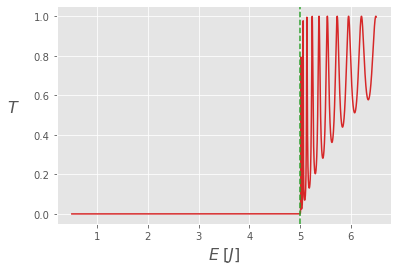

In [81]:
m = 9.11 * 1e-31
V0 = 5 
alpha = 5 
hbar = 1.05 * 1e-34

def T_1(E, V0, alpha):
    " E < V0 "
    
    k = np.sqrt(2 * m * E) / hbar
    kappa = np.sqrt(2 * m * (V0 - E)) / hbar
    return 1 / (1 + np.sinh(kappa * alpha)**2 * (k**2 + kappa**2)**2 / (2*k*kappa)**2 )

def T_2(E, V0, alpha):
    " E > V0 "
    
    k = np.sqrt(2 * m * E) / hbar
    k0 = np.sqrt(2 * m * (E - V0)) / hbar
    return 1 / (1 + np.sin(k0 * alpha)**2 * (k**2 - k0**2)**2 / (2*k*k0)**2 )

def plot_barrier_transmission(V0_, alpha_):
    V0_ = V0_ * 1.6* 1e-19
    alpha_ = alpha_ * 1e-9
    
    E = np.linspace(0.1, 0.999, 1000) * V0_ 
    T = T_1(E, V0_, alpha_)
    plt.plot(E / (1.6 * 1e-19), T, 
             color="tab:red")

    E = np.linspace(1.001, 1.3, 1000) * V0_
    T = T_2(E, V0_, alpha_)
    plt.plot(E / (1.6 * 1e-19), T, 
             color="tab:red")

    plt.axvline(V0_ / (1.6 * 1e-19), 
                linestyle="dashed", 
                color="tab:green")
    plt.xlabel(r"$E \;[J]$", fontsize=16)
    plt.ylabel(r"$T$", fontsize=16, rotation=0, labelpad=20)
    plt.show()
    
plot_barrier_transmission(V0, alpha)

In [82]:
interact(plot_barrier_transmission, V0_=(1., 10, 1), alpha_=(0.1, 3, .2))
plt.show()

interactive(children=(FloatSlider(value=5.0, description='V0_', max=10.0, min=1.0, step=1.0), FloatSlider(valu…

# Ramsauer-Townsend Effect

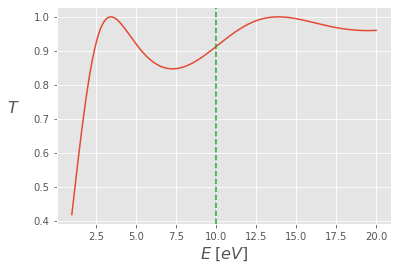

In [83]:
m = 9.11 * 1e-31
V0 = 10 
alpha = 0.5 
hbar = 1.05 * 1e-34

def plot_ramsauer(V0_, alpha_):
    V0_ = V0_ * 1.6* 1e-19
    alpha_ = alpha_ * 1e-9
    
    E = np.linspace(.1, 2, 1000) * V0_
    plt.plot(E / (1.6 * 1e-19), T_2(E, -V0_, alpha_))
    plt.axvline(V0_ / (1.6 * 1e-19), linestyle="dashed", color="tab:green")
    plt.xlabel(r"$E \;[eV]$", fontsize=16)
    plt.ylabel(r"$T$", fontsize=16, rotation=0, labelpad=20)
    plt.show()
    
plot_ramsauer(V0, alpha)

In [84]:
interact(plot_ramsauer, V0_=(0.1, 10, 1), alpha_=(0.01, 3, .2))
plt.show()

interactive(children=(FloatSlider(value=4.1, description='V0_', max=10.0, min=0.1, step=1.0), FloatSlider(valu…